In [2]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms

To extract neighbors a mask is created that will be moved over the image to create new features.

In [3]:
def create_circular_mask(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    mask[radius][radius] = 0
    kernel[mask] = 1
    return kernel

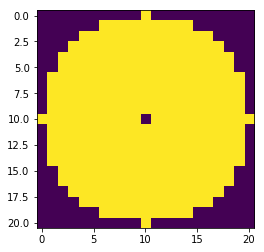

In [4]:
#Example of mask
plt.imshow(create_circular_mask(10))

In [5]:
im = Image.open("croppedImage_skyview200x200.tif")
arr = np.asarray(im)
mask = create_circular_mask(2)

for row in arr:
    for pixel in row:
        if pixel < 0.5:
            print(pixel)
            print(np.where(arr == pixel))

#plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
#ax = [plt.subplot(1,1,i+1) for i in range(1)]
#for a in ax:
 #   a.set_xticklabels([])
  #  a.set_yticklabels([])
   # a.tick_params(bottom=False, left=False)
#plt.subplots_adjust(wspace=0,hspace=0)

#ax[0].title.set_text("Original")
#ax[0].imshow(arr)

#ax[1].title.set_text("Median")
#ax[1].imshow(gf(arr,np.nanmedian,footprint=mask))

#ax[2].title.set_text("Mean")
#ax[2].imshow(gf(arr,np.nanmean,footprint=mask))

#ax[3].title.set_text("Standard deviation")
#ax[3].imshow(gf(arr,np.nanstd,footprint=mask))

#ax[4].title.set_text("Maximum")
#ax[4].imshow(gf(arr,ms.tmax,footprint=mask))

#ax[5].title.set_text("Skew")
#ax[5].imshow(gf(arr,ms.skew,footprint=mask))

#ax[6].title.set_text("variance")
#ax[6].imshow(gf(arr,ms.trimmed_var,footprint=mask))

#ax[7].title.set_text("Standard error of the mean")
#ax[7].imshow(gf(arr,ms.sem,footprint=mask))

7538


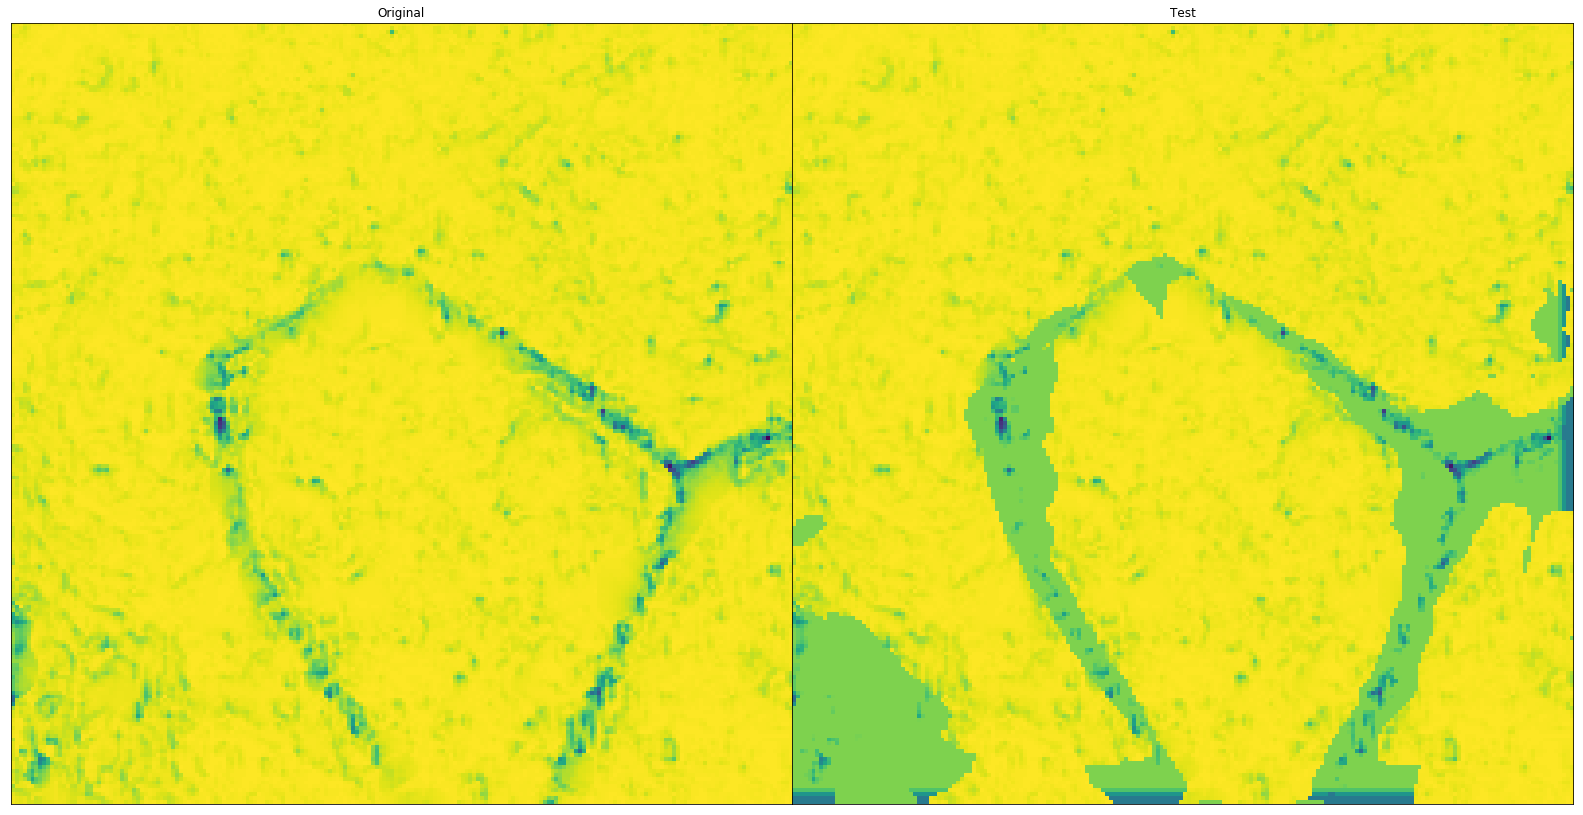

In [42]:
def create_conic_mask(radius, direction):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    if direction == 0:
        mask = (x > y) & (x < abs(y)) & (x**2 + y**2 <= radius**2)
    elif direction == 1:
        mask = (x > abs(y)) & (x**2 + y**2 <= radius**2)
    elif direction == 2:
        mask = (abs(x) < y) & (x**2 + y**2 <= radius**2)
    elif direction == 3:
        mask = (abs(x) > abs(y)) & (x < abs(y)) & (x**2 + y**2 <= radius**2)    
    kernel[mask] = 1
    return kernel

def conicMean(arr, masks, threshold):
    newArr = arr.copy()
    amountOfThresholds = 0
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            meanTop = meanFromMask(arr, (i, j), masks[0])
            meanRight = meanFromMask(arr, (i, j), masks[1])
            meanBottom = meanFromMask(arr, (i, j), masks[2])
            meanLeft = meanFromMask(arr, (i, j), masks[3])
            if meanTop < threshold:
                if meanBottom < threshold:
                    amountOfThresholds += 1
                    if meanTop < meanBottom:
                        newValue = meanTop
                    else:
                        newValue = meanBottom
                    if newValue < 0.75:
                        newValue = 0.85
                    elif newValue < 0.80:
                        newValue = 0.88
                    elif newValue < 0.85:
                        newValue = 0.91
                    elif newValue < 0.90:
                        newValue = 0.93
                    else:
                        newValue = 0.95
                    newArr[i][j] = newValue
            if meanRight < threshold:
                if meanLeft < threshold:
                    amountOfThresholds += 1
                    if meanRight < meanLeft:
                        newValue = meanRight
                    else:
                        newValue = meanLeft
                    if newValue < 0.75:
                        newValue = 0.85
                    elif newValue < 0.80:
                        newValue = 0.88
                    elif newValue < 0.85:
                        newValue = 0.91
                    elif newValue < 0.90:
                        newValue = 0.93
                    else:
                        newValue = 0.95
                    newArr[i][j] = newValue
            if newArr[i][j] > arr[i][j]:
                newArr[i][j] = arr[i][j]
    print(amountOfThresholds)        
    return newArr

def meanFromMask(arr, index, mask):
    elementAmount = 1
    row = index[0]
    col = index[1]
    
    halfMask = len(mask) // 2
    
    arrLen = len(arr)
        
    elementSum = 0
    for i in range(-halfMask , halfMask):
        for j in range(-halfMask , halfMask):
            if arrLen - 2 > col + j or col + j >= 0 or arrLen - 2 > row + i or row + i >= 0:
                if mask[i + halfMask][j + halfMask] == 1:
                    #print(row + i)
                    #print(col + j)
                    if row + i < 200:
                        if col + j < 200:
                            elementSum += arr[row + i][col + j]
                            elementAmount += 1
    return elementSum / elementAmount

#plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
#ax = [plt.subplot(2,2,i+1) for i in range(4)]
#for a in ax:
#    a.set_xticklabels([])
#    a.set_yticklabels([])
#    a.tick_params(bottom=False, left=False)
#plt.subplots_adjust(wspace=0,hspace=0)


#ax[0].imshow(create_conic_mask(20, 0))
#ax[1].imshow(create_conic_mask(20, 1))
#ax[2].imshow(create_conic_mask(20, 2))
#ax[3].imshow(create_conic_mask(20, 3))

masks = []
for i in range(0, 4):
    #ax[i].imshow(create_conic_mask(10, i))
    masks.append(create_conic_mask(20, i))

#print(len(masks))
#for mask in masks:
#    print(mask)

newConicArr = conicMean(arr, masks, 0.985)
#count = 0
#for row in arr:
#    for pixel in row:
#        if pixel < 0.95:
#            count +=1
#            print(pixel)
#print("count:")        
#print(count)

plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,2,i+1) for i in range(2)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Original")
ax[0].imshow(arr)

ax[1].title.set_text("Test")
ax[1].imshow(newConicArr)